In [23]:
# Problem statement: Predict purchased based on extimatedsalary ?  .
# wheterhe a person can make a 
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression

# For Evaluation 
import sklearn.metrics 

In [8]:
#Step2: reading data 
data = pd.read_csv('Social_Network_Ads.csv')

print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    15

In [9]:
data.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [11]:
# Label Encosing
le = LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       1   19            19000          0
1  15810944       1   35            20000          0
2  15668575       0   26            43000          0
3  15603246       0   27            57000          0
4  15804002       1   19            76000          0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int64
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int64(5)
memory usage: 15.8 KB


In [17]:
# scalling reducing the data set
# requirement for scalling 
# Age and EstimatedSalarry   different range values --> subject to scalling 

# Scalling  DIY Check Z score and transformation 
sc=StandardScaler()
data[['Age','EstimatedSalary']]=sc.fit_transform(data[['Age','EstimatedSalary']])
print(data)

#Segregation/Separating Independent and dependent variables
x = data [['Gender','Age','EstimatedSalary']]
y=data[['Purchased']]
print(x)
print(y)

      User ID  Gender       Age  EstimatedSalary  Purchased
0    15624510       1 -1.781797        -1.490046          0
1    15810944       1 -0.253587        -1.460681          0
2    15668575       0 -1.113206        -0.785290          0
3    15603246       0 -1.017692        -0.374182          0
4    15804002       1 -1.781797         0.183751          0
..        ...     ...       ...              ...        ...
395  15691863       0  0.797057        -0.844019          1
396  15706071       1  1.274623        -1.372587          1
397  15654296       0  1.179110        -1.460681          1
398  15755018       1 -0.158074        -1.078938          0
399  15594041       0  1.083596        -0.990844          1

[400 rows x 5 columns]
     Gender       Age  EstimatedSalary
0         1 -1.781797        -1.490046
1         1 -0.253587        -1.460681
2         0 -1.113206        -0.785290
3         0 -1.017692        -0.374182
4         1 -1.781797         0.183751
..      ...       ... 

In [45]:
# Train Test Split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
print(x_train.head())
print(x_test.head())

(320, 3) (80, 3)
(320, 1) (80, 1)
     Gender       Age  EstimatedSalary
171       1 -0.349100         1.328980
68        0 -1.495258        -0.197993
121       1 -0.062561         0.066291
50        0 -1.304232        -1.108303
367       1  0.797057         0.536129
     Gender       Age  EstimatedSalary
183       1 -0.444614        -0.785290
41        0 -0.444614        -0.550371
261       1 -0.158074         2.180561
190       1 -1.304232         0.418669
376       0  0.797057         0.125021


In [33]:
# Train Logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)


C:\Users\akram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [35]:
# Checking prediction accuracy (Known data)
print(log_reg)
y_pred=log_reg.predict(x_train)
print(y_pred)
print("Train accuracy: ", sklearn.metrics.accuracy_score(y_train,y_pred))

LogisticRegression()
[0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0
 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1
 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0]
Train accuracy:  0.8625


In [36]:
# Checking prediction accuracy (UnKnown data)
y_pred=log_reg.predict(x_test)
print(y_pred)
print("Test accuracy: ", sklearn.metrics.accuracy_score(y_test,y_pred))

[0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0 0 0 0]
Test accuracy:  0.8375


In [37]:
# Specific Evaluation Prediction {gender 1, age 25, salary 60000}
print(log_reg.predict([[1,25,60000]]))

[1]


C:\Users\akram\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


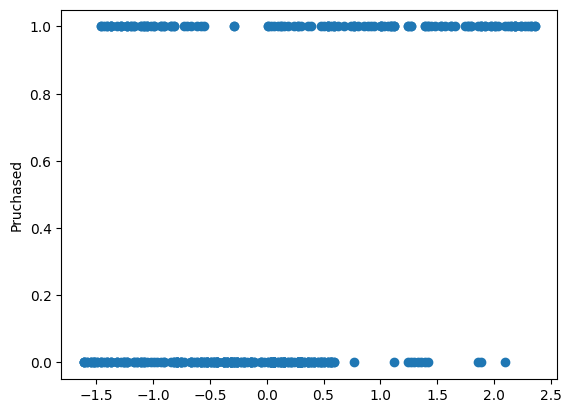

In [38]:
plt.scatter(data['EstimatedSalary'],data['Purchased'])
#plt.plot(data['TV'],y_pred,color='red')
#plt.xlabel("TV Add exp")
plt.ylabel("Pruchased")
plt.show()

In [46]:
# Step 6: Retrieve model coefficients and intercept to construct the equation
coefficients = log_reg.coef_[0]  # Coefficients for each feature
intercept = log_reg.intercept_[0]  # Intercept of the model

# Print out the logistic regression equation
print(f"Logistic Regression Model Equation:")
print(f"log(odds) = {intercept:.4f} + ({coefficients[0]:.4f} * Gender) + ({coefficients[1]:.4f} * Age) + ({coefficients[2]:.4f} * EstimatedSalary)")

Logistic Regression Model Equation:
log(odds) = -1.2103 + (0.3631 * Gender) + (2.3056 * Age) + (0.9918 * EstimatedSalary)


In [47]:
# Model coefficients (weights)
print("Intercept (β0):", log_reg.intercept_[0])
print("Coefficients (β1, β2, β3):", log_reg.coef_[0])

# Equation form:
intercept = log_reg.intercept_[0]
coefficients = log_reg.coef_[0]
print(f"Model Equation: P(y=1) = 1 / (1 + exp(-({intercept:.2f} + {coefficients[0]:.2f}*Gender + {coefficients[1]:.2f}*Age + {coefficients[2]:.2f}*EstimatedSalary)))")

Intercept (β0): -1.2103009772960798
Coefficients (β1, β2, β3): [0.36310784 2.30562947 0.99177637]
Model Equation: P(y=1) = 1 / (1 + exp(-(-1.21 + 0.36*Gender + 2.31*Age + 0.99*EstimatedSalary)))
